# Multivariate Regression

In [3]:
# notebook imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Basic Info Gathering

In [4]:
boston_dataset = load_boston()
print(boston_dataset.data.shape)
type(boston_dataset)



(506, 13)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

sklearn.utils.Bunch

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [6]:
columns = boston_dataset.feature_names
target = boston_dataset.target


In [7]:
data = pd.DataFrame(data=boston_dataset.data,columns = columns)  # now data is a dataframe

# add target column
data['PRICE'] = target
# data.head()
# data.count()  

## Check missing data and clean data

In [8]:
# data.isnull().any()
# data.isnull().nunique()  # o/p 1 means no unique data i.e no NAN value

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


## Visualizing data with histograms, Distributions and Bar Charts

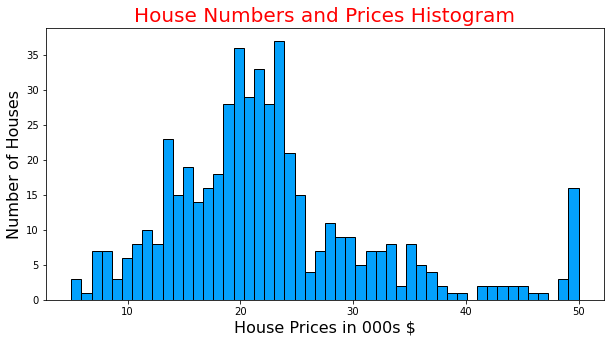

In [10]:
plt.figure(figsize=[10,5])
plt.hist(target,50,ec='black',color="#03a1fc")
plt.title("House Numbers and Prices Histogram",fontsize=20,color='red')
plt.ylabel("Number of Houses",fontsize=16,color='black')
plt.xlabel("House Prices in 000s $",fontsize=16,color='black')
plt.show()

### Visualization using seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


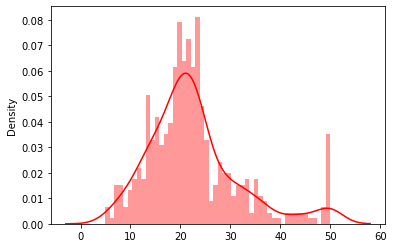

In [11]:
sns.distplot(target,bins=50,color='red')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

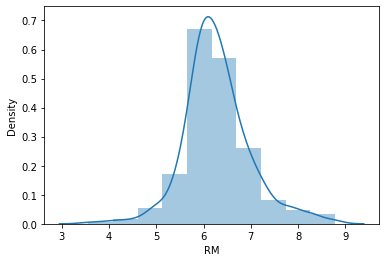

In [12]:
sns.distplot(data['RM'],bins=10)

In [13]:
data['RM'].mean()   # the avg no of rooms in a house

6.284634387351787

In [14]:
# plt.hist(data['RAD'],bins=25,color='royalblue')
# plt.show()
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

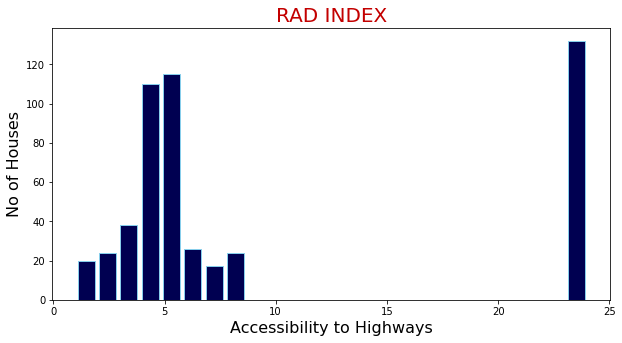

In [15]:
plt.figure(figsize=[10,5])
plt.hist(data['RAD'],bins=24,ec='skyblue',color='#000051',histtype='bar',rwidth=.8)
plt.title("RAD INDEX",fontsize=20,color='#c30000')
plt.ylabel("No of Houses",fontsize=16)
# plt.grid()16,color='black')
plt.xlabel("Accessibility to Highways",fontsize=16)
plt.show()

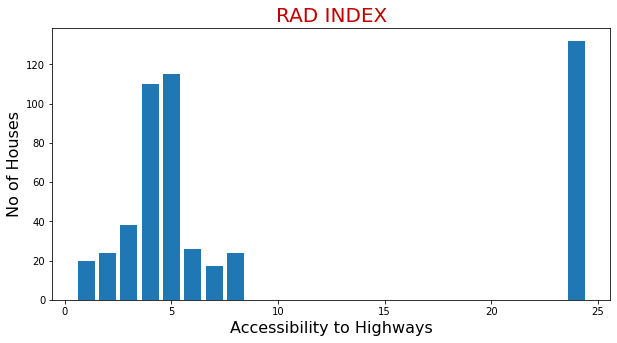

In [16]:

frequency = data['RAD'].value_counts()
f_index = frequency.index
type(f_index)
f_index = np.array(f_index)
type(f_index)
f_index
frequency.axes[0]

plt.figure(figsize=[10,5])
plt.bar(f_index,frequency)

plt.title("RAD INDEX",fontsize=20,color='#c30000')
plt.ylabel("No of Houses",fontsize=16)
# plt.grid()16,color='black')
plt.xlabel("Accessibility to Highways",fontsize=16,color='black')

plt.show()
# plt.xticks(f_index)

In [17]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

analyzing various characters of data to find how data might behave. For eg mean, median, min, max etc give a way for descriptive statistics


In [19]:
print(data['PRICE'].min())
print(data['PRICE'].max())
print(target.mean())

5.0
50.0
22.532806324110677


In [20]:
# or simply
print(data.min())

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64


In [21]:
data.max()
data.median()
data.describe()  # excludes NaN values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

### $ \rho _{xy} = corr(x,y) $  
where ( $ -1 \leq \rho _{xy} \leq +1 $ )

#### relation between two parameters
+ Positive correlation: if one increases, so does the other ( eg a is a linear regression line with positive slope)
- Negative correlation: if one increases, other decreases and vice-versa

correlation is significant to determine the independent variables that affect target variable the most. The correlation coeffient close to 1 signifies that the given feature is more significant in determining the target value. 
Also, the direction of correlation is important

In [22]:
# correlation between two columns
# syntax: col1.corr(col2)
# eg:
data['PRICE'].corr(data['RM']) 

0.695359947071539

In [23]:
# correlation between price and pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [24]:
# correlation of each variable with other
data.corr()  # Karl Person correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Multicollinearity

when two or more features are highly correlated.
- may cause issues to determine the effect of one of the highly correlated features in target

In [25]:
# only storing the value of upper triangle as lower triangle is just the duplicate value in correlation table
mask = np.zeros_like(data.corr())
triangle_indices =  np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

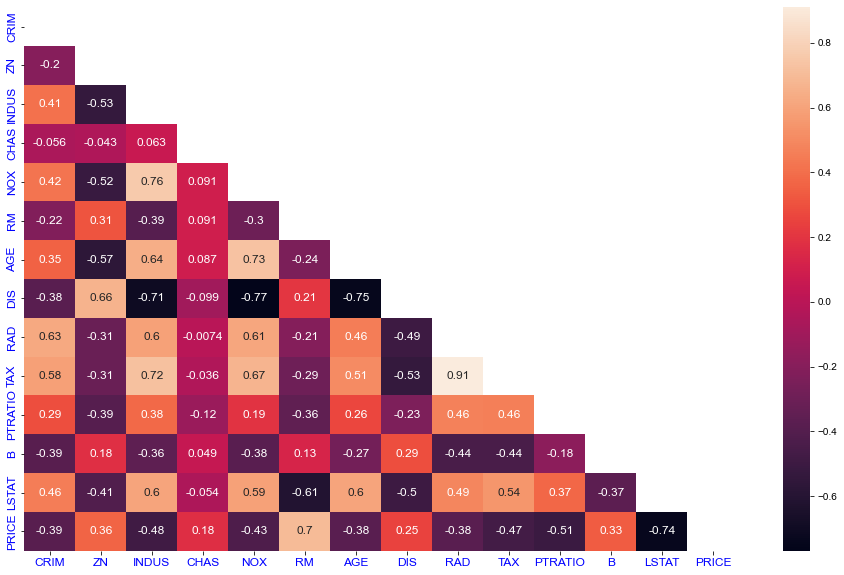

In [26]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":12})
sns.set_style("whitegrid")
plt.xticks(fontsize=12,color='blue')
plt.yticks(fontsize=12,color='blue')
plt.show()

## NOTE
 - Pearson Correlation is only valid for continuous data and not for discrete data like CHAS, RAD
 - Correlation  doesn't imply causation 
 - Only linear relationships are described by corr

#### Anscombe's Quartet : four graphs that make it clear that only descriptive analysis  is not enough to find outliers but visualization is also important

In [130]:

from pandas import DataFrame
from sklearn.linear_model import LinearRegression

# anscombe = pd.read_csv("Anscombe_quartet_data.csv")  # data from kaggle 
# anscombe
# x123 = anscombe['x123']
# x4 = anscombe['x4']
# y1=anscombe['y1']
# y2 = anscombe['y2']
# y3 = anscombe['y3']
# y4 = anscombe['y4']

# rgr_1 = LinearRegression()
# x_1= DataFrame(anscombe,columns=['x123'])
# y_1 = DataFrame(anscombe,columns=['y1'])
# rgr_1.fit(x_1,y_1)

# rgr_2 = LinearRegression()
# y_2 = DataFrame(anscombe,columns=['y2'])
# rgr_2.fit(x_1,y_2)

# rgr_3 = LinearRegression()
# y_3 = DataFrame(anscombe,columns=['y3'])
# rgr_3.fit(x_1,y_3)

# rgr_4 = LinearRegression()
# x_4= DataFrame(anscombe,columns=['x4'])
# y_4 = DataFrame(anscombe,columns=['y4'])
# rgr_4.fit(x_4,y_4)



# COLOR_1 = "orange"
# COLOR_2 = 'black'
# sns.set_style("whitegrid")
# plt.figure(figsize=[20,10])

# plt.subplot(2,2,1)
# plt.title(f"Correlation = {round(x123.corr(y1),3)}",fontsize=14)
# plt.scatter(x123,y1,color=COLOR_1,s=200)
# plt.plot(x123,rgr_1.predict(x_1),color=COLOR_2)

# plt.subplot(2,2,2)
# plt.title(f"Correlation = {round(x123.corr(y2),3)}",fontsize=14)
# plt.scatter(x123,y2,color=COLOR_1,s=200)
# plt.plot(x123,rgr_1.predict(x_1),color=COLOR_2)

# plt.subplot(2,2,3)
# plt.title(f"Correlation = {round(x123.corr(y3),3)}",fontsize=14)
# plt.scatter(x123,y3,color=COLOR_1,s=200)
# plt.plot(x123,rgr_1.predict(x_1),color=COLOR_2)

# plt.subplot(2,2,4)
# plt.title(f"Correlation = {round(x4.corr(y4),3)}",fontsize=14)
# plt.scatter(x4,y4,color=COLOR_1,s=200)
# plt.plot(x4,rgr_1.predict(x_4),color=COLOR_2)

# plt.show()





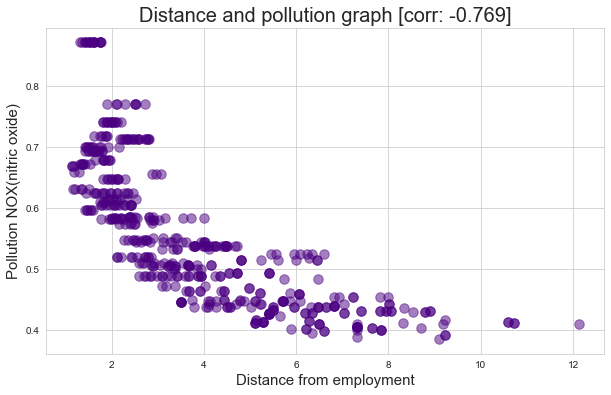

In [29]:
# Relation between distance and pollution
correlation = data['NOX'].corr(data['DIS'])

plt.figure(figsize=[10,6])
plt.scatter(data['DIS'],data['NOX'],alpha=.5,s=90,color="indigo")
plt.title(f"Distance and pollution graph [corr: {round(correlation,3)}]",fontsize=20)
plt.xlabel("Distance from employment",fontsize=15)
plt.ylabel("Pollution NOX(nitric oxide)",fontsize=15)
# plt.grid()
plt.show()

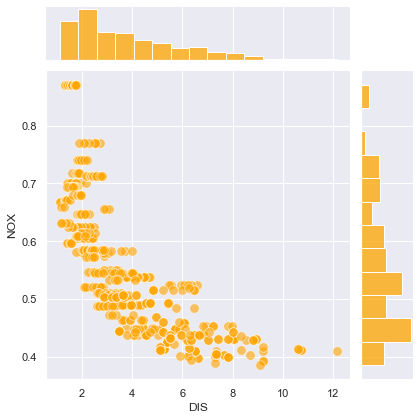

In [30]:
sns.set()
sns.set_context("notebook")
sns.set_style("darkgrid")
sns.jointplot(x=data['DIS'],y=data['NOX'],height=6,s=90,joint_kws={"alpha":.6},color="orange")
plt.show()

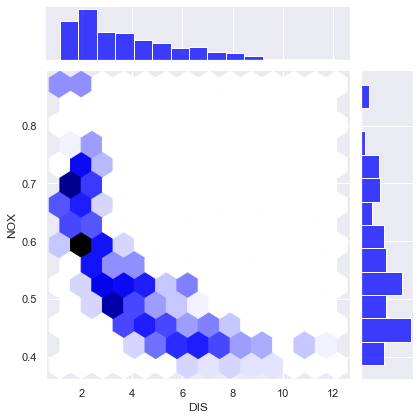

In [31]:
sns.set()
sns.set_context("notebook")
sns.set_style("darkgrid")
sns.jointplot(x=data['DIS'],y=data['NOX'],height=6,kind='hex',color="blue")
plt.show()

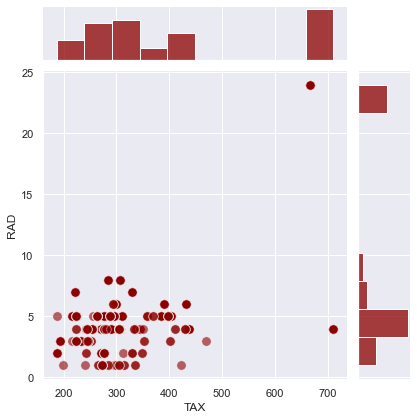

In [32]:
sns.set()
sns.set_context("notebook")
sns.set_style("darkgrid")
sns.jointplot(x=data['TAX'],y=data['RAD'],height=6,s=90,joint_kws={"alpha":.6},color="darkred")
plt.show()

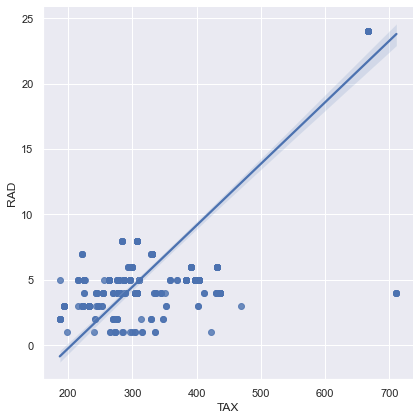

In [33]:
sns.lmplot(x='TAX',y='RAD',data=data,height=6)
plt.show()

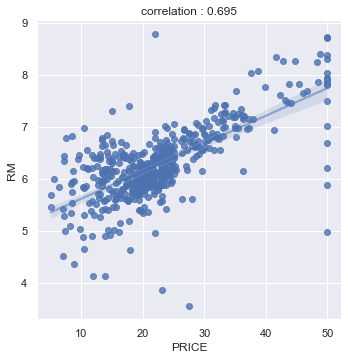

In [34]:
# PRICE v/s RM
rm_tgt_corr = data['PRICE'].corr(data['RM'])
sns.lmplot(x='PRICE',y="RM",data=data,height=5,line_kws={'alpha':.5})
plt.title(f"correlation : {round(rm_tgt_corr,3)}")
plt.show()

# !! Alert : Takes more time to run the below 2 cells

In [119]:
# %%time
# # Plots between all columns
# sns.pairplot(data)
# plt.show()

In [118]:
# %%time
# # plots with linear regression line

# sns.pairplot(data,kind='reg',plot_kws={"line_kws":{"color":"cyan"}})   
# plt.show()

## Multivariate regression 
$ y = \theta _{1} + \theta_{2} NOX + \theta_{3} RAD .... + \theta_{n}\ n^{th}  column  $

-Regression to the mean: (origin of word regression) 

# Splitting Training and Testing datasets

In [120]:
prices = data['PRICE']
features = data.drop("PRICE",axis=1)
X_train, X_test, y_train,y_test = train_test_split(features,prices,test_size=.2,train_size=.8,random_state=10)
# % of train dataset
print(len(X_train)/len(features))

# % of test dataset
print(len(X_test)/len(features))

0.7984189723320159
0.2015810276679842


## Multivariable Regression 

In [121]:
regr = LinearRegression()
regr.fit(X_train,y_train)

print("Intercept: ", regr.intercept_)
pd.DataFrame(data=regr.coef_,index = X_train.columns,columns=['coeff'])  # values of theta

Intercept:  -48.31344468953688


,coeff
CRIM,0.094842
ZN,0.030193
INDUS,-0.049998
CHAS,0.295732
NOX,-1.558064
RM,1.574419
AGE,0.000340
DIS,-0.487552
RAD,-0.000400
TAX,0.001397


In [122]:
# challenge: print out r-squared for training and test dataset
print(f"Training r-squared: {regr.score(X_train,y_train)}")
print(f"Testing r-squared: {regr.score(X_test,y_test)}")

Training r-squared: 0.9410778824532241
Testing r-squared: 0.9433354123683758


## Model Evaluation

- R-squared
- p-values
- VIF
- BIC 

In [123]:
## Data Transformations
# concept of skew (right skewed and left skewed)

In [124]:
data['PRICE'].skew()

# skew value of non skewed dataset is 0 , positive means right skewed and negative means left skewed

1.1080984082549072

In [125]:
y_log = np.log(data['PRICE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


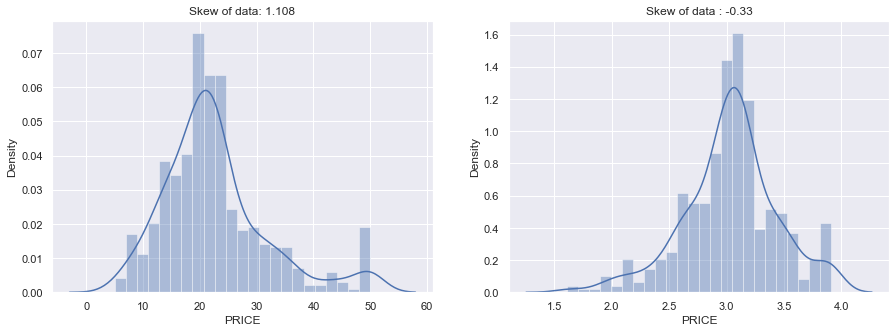

In [126]:
# price without log transformation v/s with transformation
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.distplot(data['PRICE'])
plt.title(f"Skew of data: {round(data['PRICE'].skew(),3)}")

plt.subplot(1,2,2)
sns.distplot(y_log)
plt.title(f"Skew of data : {round(y_log.skew(),3)}")
plt.show()

<Figure size 1080x360 with 0 Axes>

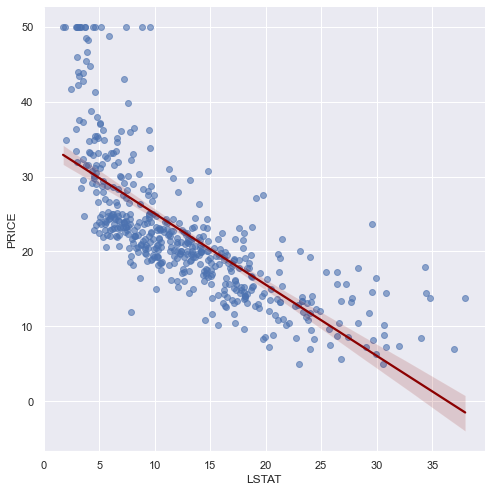

In [127]:
# comparison of non log and logged prices against LSTAT
plt.figure(figsize=[15,5])
sns.lmplot(x='LSTAT',y="PRICE",data=data,height=7,scatter_kws={"alpha":.6},line_kws={"color":"darkred"})
plt.show()

<Figure size 1080x360 with 0 Axes>

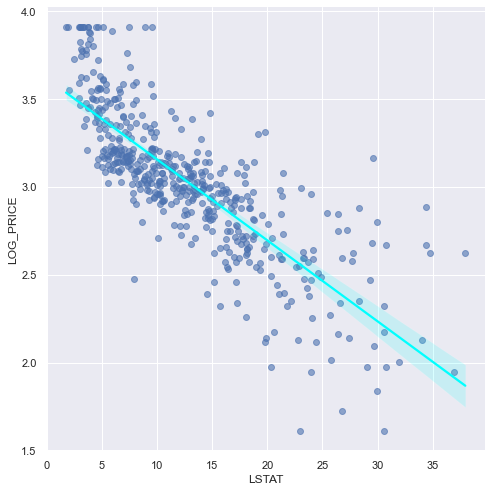

In [128]:
# comparison of non log and logged prices against LSTAT
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
plt.figure(figsize=[15,5])
sns.lmplot(x='LSTAT',y="LOG_PRICE",data=transformed_data,height=7,scatter_kws={"alpha":.6},line_kws={"color":"cyan"})
plt.show()

## Regression on Log data

In [129]:
prices = np.log(data['PRICE'])   # Use of log prices
features = data.drop("PRICE",axis=1)
X_train, X_test, y_train,y_test = train_test_split(features,prices,test_size=.2,train_size=.8,random_state=10)

regr = LinearRegression()
regr.fit(X_train,y_train)

print(f"Training r-squared: {regr.score(X_train,y_train)}")
print(f"Testing r-squared: {regr.score(X_test,y_test)}")

print("Intercept: ", regr.intercept_)
pd.DataFrame(data=regr.coef_,index = X_train.columns,columns=['coeff'])  # values of theta

Training r-squared: 1.0
Testing r-squared: 1.0
Intercept:  6.217248937900877e-15


,coeff
CRIM,-7.101479e-18
ZN,-2.635036e-17
INDUS,6.368110e-17
CHAS,-2.763683e-16
NOX,1.974492e-15
RM,-1.866248e-16
AGE,1.011988e-17
DIS,1.706028e-16
RAD,4.624225e-17
TAX,-1.210398e-17
